Goal: Practice regression analysis using California housing data native in sklearn.datasets. Due to the the urgency of moving clients out, I want to show a prediction of when we should be done.

In [2]:
##import housing data, pandas
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [3]:
##load data
data = fetch_california_housing()
housing = pd.DataFrame(data.data, columns=data.feature_names)
housing["target"] = data.target

In [4]:
##EDA: first 5 rows, column names
print(housing.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [5]:
##clean: missing. There are no missing values.
housing.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [6]:
##clean: duplicates. There are no duplicates.
housing.duplicated().any()

False

In [7]:
##EDA: describe data. The average income in this dataset representing CA is $38,707. The median incomce is $35,348.
##The average age of houses in CA represented by this dataset is 29 years.
##There are 5 rooms on average and 1 bedroom on average in CA houses represented by this dataset.
##An average of 3 people occupy CA houses.
##There are, on average, 1425 people per block group where these houses are located.
##CA houses have an average value of $207,000. The median value is $179,700.
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
##Regression Analysis - predict home values
##load modules
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
##Regression Analysis - predict home values
##prepare data
##to predict target from other columns: x = other columns, y = target column
reg_data = housing
x = reg_data.drop('target', axis=1)
y = reg_data['target']

In [10]:
##Regression Analysis - predict home values
##split data for training and testing
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)

In [11]:
##Regression Analysis - predict home values
##choose and train a model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
##Regression Analysis - predict home values
##predict
y_pred = model.predict(x_test)

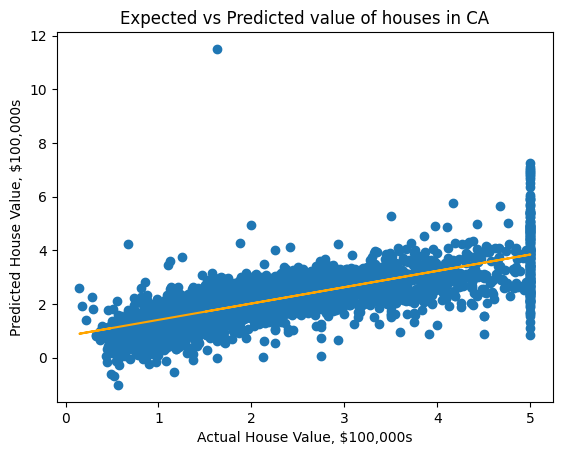

<Figure size 640x480 with 0 Axes>

In [16]:
##Regression Analysis - predict home values
##Regression, import chart module
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Value, $100,000s')
plt.ylabel('Predicted House Value, $100,000s')
plt.title('Expected vs Predicted value of houses in CA')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*(y_test)+b, color='orange')
plt.show()
plt.clf()

In [14]:
##Regression Analysis - predict home values
##Evaluate: mean squared error shows how well the predicted values match the actual values. mse = 0.556, fair fit.
##Root MSE converts error so it has the same units as the y value for easier interpretation. rmse = .7, with an average home value of $200,000,
##the model varies by $70,000, fair fit.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}. Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.555891598695244. Root Mean Squared Error: 0.7455813830127761


In [15]:
##Regression analysis: cross validation - predict home values
##R^2 returned to show fit of the model to the data. R^2 about 0.5 shows a good fit.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print(scores)

[0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]


Goal 2: use model to predict unknown targets for similar data.